# Classification I

Classification consist in answering yes or no question, or more generally labeling data. The function seeked in the regression problem is here used to split the space $\mathbb{R}^n | n >= 1 $. Say the function $f(x) | x \in \mathbb{R}^n => (0,1)$, the output is chosen as $1 if f(x) >= 0, else 0$.

<img src="./images/2.01_class_students.png" alt="Drawing" style="width: 400px;"/>
<img src="./images/2.01_class_multidim.png" alt="Drawing" style="width: 400px;"/>


More generally, the steps can be represented by a perceptrion diagram:
 * inputs
 * weights (linear function coefficients, + bias)
 * linear function
 * step function
 * output

<img src="./images/2.03_perceptron_diagram.png" alt="Drawing" style="width: 700px;"/>

The way to update the function is as follows:
 * initialise function coefficients
 * evaluate if points are in the correct semi-space
 * consider only the wrongly predicted, and loops through them:
     * if the point is positive, but predicted negative, the weights are increased
     * if the poins is negative, but predicted positive, the weights are dicreased

Formula to update weights:
\begin{equation*}
W = W \pm \alpha X
b = b \pm \alpha
\end{equation*}
where $\pm$ is applied accordingly to how the point is misclassified

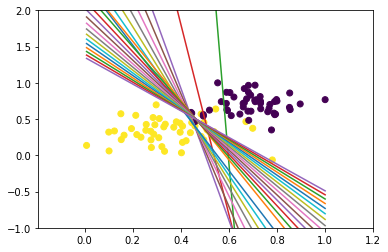

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    # Fill in code
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y_hat > y[i]:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
        elif y_hat < y[i]:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
    
            
    return W, b
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines

# TODO import stuff from csv
df = pd.read_csv(r"data\data_3.csv", header=None)
X = np.array(df.iloc[:,:-1])
y = np.array(df.iloc[:,-1])

#lines is an array of [m,b] coefficient of lines
lines = trainPerceptronAlgorithm(X,y)

#sample points
plt.scatter(X.T[0],X.T[1],c=y)
lines
x1=min(X.T[0])
x2=max(X.T[0])
for m,b in lines:
    plt.plot([x1,x2],[m*x1+b,m*x2+b])
plt.xlim(x1-0.2,x2+0.2)
plt.ylim(-1,2)
plt.show()